In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib styles
%matplotlib inline
plt.style.use('fivethirtyeight')

# Set dataframe viewing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Upload cleanded data from local machine
file_path = '/Users/nickburkhalter/Desktop/mortality/'
data = '2015_data_cleaned.csv'

df = pd.read_csv(file_path + data)
print(df.shape)
print(df.memory_usage(index=True).sum())
df.head()

(700000, 24)
134400080


,resident_status,month_of_death,sex,detail_age_type,detail_age,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,130_infant_cause_recode,39_cause_recode,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level,age_bin
0,RESIDENTS,October,Female,Years,75,Age 1 year and over or not stated,Other,Widowed,Friday,Unknown,Natural,Burial,No,Not applicable,NaN,NaN,Chronic lower respiratory diseases (J40-J47),White,White,White,100,Non - Hispanic white,high school,75 - 84 years
1,RESIDENTS,April,Male,Years,63,Age 1 year and over or not stated,"Hospital, Clinic or Medical Center",Married,Monday,Unknown,Natural,Cremation,Yes,Not applicable,NaN,NaN,Hypertensive heart disease with or without ren...,White,White,White,100,Non - Hispanic white,college,55 - 64 years
2,INTRASTATE NONRESIDENTS,January,Female,Years,87,Age 1 year and over or not stated,Nursing home/long term care,Married,Saturday,Unknown,Not specified,Cremation,No,Not applicable,NaN,NaN,"All other diseases (Residual) (A00-A09,A20-A49...",White,White,White,100,Non - Hispanic white,college,85 years and over
3,INTRASTATE NONRESIDENTS,March,Male,Years,78,Age 1 year and over or not stated,"Hospital, clinic or Medical Center",Married,Tuesday,Unknown,Natural,Cremation,No,Not applicable,NaN,NaN,"Malignant neoplasms of trachea, bronchus and l...",White,White,White,100,Non - Hispanic white,college,75 - 84 years
4,RESIDENTS,March,Female,Years,85,Age 1 year and over or not stated,Decedent’s home,Widowed,Thursday,Unknown,Not specified,Cremation,No,Not applicable,NaN,NaN,Influenza and pneumonia (J09-J18),White,White,White,100,Non - Hispanic white,high school,85 years and over


In [3]:
# Create function to wrangle new features
def wrangle(X):
    
    # Make copy of X so as not to contaminate original
    X = X.copy()
    
    # Create heart_disease feature (did person die of heart disease?)
    X['heart_disease'] = (X['39_cause_recode'].str.contains('heart')) | (X['39_cause_recode'].str.contains('heart'))
    # Create feature for cancer (keyword 'malignant neoplasm')
    X['cancer'] = ((X['39_cause_recode'].str.contains('Malignant neoplasm')) | 
                   (X['39_cause_recode'].str.contains('malignant neoplasm')) | 
                   (X['39_cause_recode'].str.contains('Leukemia')))
    # Create feature for HIV
    X['hiv'] = (X['39_cause_recode'].str.contains('HIV'))
    # Create feature for suicide
    X['suicide'] = (X['39_cause_recode'].str.contains('suicide'))
    # Create feaure for homicide
    X['homicide'] = (X['39_cause_recode'].str.contains('homicide'))
    # Create feature for accidents
    X['accident'] = (X['39_cause_recode'].str.contains('accident'))
    # Create feature for Alzheimer's
    X['alzheimers'] = (X['39_cause_recode'].str.contains("Alzheimer's"))
    # Create feature for respiratory
    X['respiratory'] = ((X['39_cause_recode'].str.contains('respiratory')) | 
                       (X['39_cause_recode'].str.contains('Respiratory')))
    # Create feature for diabetes
    X['diabetes'] = (X['39_cause_recode'].str.contains('Diabetes'))
    
    # Drop 39_cause_recode column to avoid leakage
    X = X.drop(columns='39_cause_recode')
    
    return X

In [4]:
# Create wrangled dataframe
test = wrangle(df)
print(test.shape)
print(test.memory_usage(index=True).sum())
test.head()

(700000, 32)
135100080


,resident_status,month_of_death,sex,detail_age_type,detail_age,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,130_infant_cause_recode,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level,age_bin,heart_disease,cancer,hiv,suicide,homicide,accident,alzheimers,respiratory,diabetes
0,RESIDENTS,October,Female,Years,75,Age 1 year and over or not stated,Other,Widowed,Friday,Unknown,Natural,Burial,No,Not applicable,NaN,NaN,White,White,White,100,Non - Hispanic white,high school,75 - 84 years,False,False,False,False,False,False,False,True,False
1,RESIDENTS,April,Male,Years,63,Age 1 year and over or not stated,"Hospital, Clinic or Medical Center",Married,Monday,Unknown,Natural,Cremation,Yes,Not applicable,NaN,NaN,White,White,White,100,Non - Hispanic white,college,55 - 64 years,True,False,False,False,False,False,False,False,False
2,INTRASTATE NONRESIDENTS,January,Female,Years,87,Age 1 year and over or not stated,Nursing home/long term care,Married,Saturday,Unknown,Not specified,Cremation,No,Not applicable,NaN,NaN,White,White,White,100,Non - Hispanic white,college,85 years and over,False,False,False,False,False,False,False,False,False
3,INTRASTATE NONRESIDENTS,March,Male,Years,78,Age 1 year and over or not stated,"Hospital, clinic or Medical Center",Married,Tuesday,Unknown,Natural,Cremation,No,Not applicable,NaN,NaN,White,White,White,100,Non - Hispanic white,college,75 - 84 years,False,True,False,False,False,False,False,False,False
4,RESIDENTS,March,Female,Years,85,Age 1 year and over or not stated,Decedent’s home,Widowed,Thursday,Unknown,Not specified,Cremation,No,Not applicable,NaN,NaN,White,White,White,100,Non - Hispanic white,high school,85 years and over,False,False,False,False,False,False,False,False,False


In [5]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
detail_age,700000.0,73.465931,22.239721,1.0,63.0,77.0,87.0,999.0


In [6]:
# Let's take a look at the 999 ages
# They seem to be placeholders for infants &/or nonresidents/foreigners
test[test['detail_age'] == 999]

,resident_status,month_of_death,sex,detail_age_type,detail_age,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,130_infant_cause_recode,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,education_level,age_bin,heart_disease,cancer,hiv,suicide,homicide,accident,alzheimers,respiratory,diabetes
4027,FOREIGN RESIDENTS,May,Female,NaN,999,Age 1 year and over or not stated,Other,Marital Status unknown,Sunday,Unknown,Suicide,Unknown,Yes,During unspecified activity,Unspecified place,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,True,False,False,False,False,False
7630,FOREIGN RESIDENTS,November,Female,NaN,999,Age 1 year and over or not stated,Other,Marital Status unknown,Thursday,Unknown,Not specified,Other,Yes,Not applicable,NaN,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,False,False,False,False,False,False
21934,FOREIGN RESIDENTS,December,Male,NaN,999,Age 1 year and over or not stated,Other,Marital Status unknown,Thursday,No,Accident,Cremation,No,During unspecified activity,NaN,NaN,White,White,White,210,Mexican,Unknown,Age not stated,False,False,False,False,False,True,False,False,False
28010,FOREIGN RESIDENTS,September,Male,Years,999,Age 1 year and over or not stated,Other,Marital Status unknown,Friday,Unknown,Could not determine,Other,Yes,Not applicable,NaN,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,False,False,False,False,False,False
41010,FOREIGN RESIDENTS,January,Male,Years,999,Age 1 year and over or not stated,Other,Marital Status unknown,Friday,Unknown,Could not determine,Other,Yes,Not applicable,NaN,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,False,False,False,False,False,False
45269,FOREIGN RESIDENTS,May,Male,NaN,999,Age 1 year and over or not stated,Other,Marital Status unknown,Monday,Unknown,Pending investigation,Other,Yes,Not applicable,NaN,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,False,False,False,False,False,False
58461,FOREIGN RESIDENTS,September,Female,NaN,999,Age 1 year and over or not stated,Other,Marital Status unknown,Thursday,No,Homicide,Burial,Yes,During unspecified activity,Unspecified place,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,False,True,False,False,False,False
58694,FOREIGN RESIDENTS,November,Male,Years,999,Age 1 year and over or not stated,Other,Marital Status unknown,Thursday,Unknown,Could not determine,Cremation,No,Not applicable,NaN,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,False,False,False,False,False,False
82335,RESIDENTS,November,Female,NaN,999,Age 1 year and over or not stated,Nursing home/long term care,Marital Status unknown,Wednesday,Unknown,Natural,Burial,Yes,Not applicable,NaN,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,True,False,False,False,False,False,False,False,False
86555,FOREIGN RESIDENTS,August,Male,Years,999,Age 1 year and over or not stated,Other,Marital Status unknown,Monday,Unknown,Could not determine,Other,Yes,Not applicable,NaN,NaN,White,White,White,998,Hispanic origin unknown,Unknown,Age not stated,False,False,False,False,False,False,False,False,False


In [7]:
# Let's try an experiment
# Replace the 999 values with np.nan, then fill the NaN values with the mean age
# Then we'll re-run the ML model and see how it affects our results
# Currently, the 999 values are weighted .66 for male, and .33 for female, which may have been skewing our results

test['detail_age'] = test['detail_age'].replace(999, np.nan)
test.describe().T

,count,mean,std,min,25%,50%,75%,max
detail_age,699863.0,73.284756,18.082718,1.0,63.0,77.0,87.0,116.0


In [8]:
test['detail_age'] = test['detail_age'].fillna(round(test['detail_age'].mean()))
test['detail_age'].isnull().sum()

0

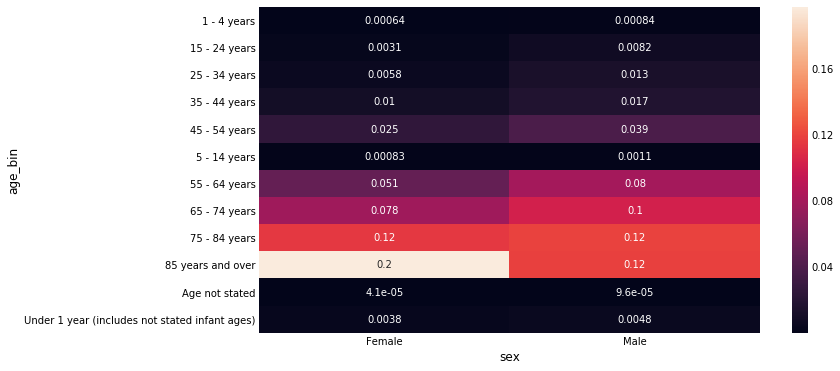

In [9]:
# Exploratory visualizations
ct = pd.crosstab(test['age_bin'], test['sex'], normalize=True)
plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True);

In [10]:
test.describe(exclude='number').T

,count,unique,top,freq
resident_status,700000,4,RESIDENTS,565284
month_of_death,700000,12,January,68701
sex,700000,2,Male,355214
detail_age_type,699928,5,Years,693900
infant_age_recode_22,700000,21,Age 1 year and over or not stated,693972
place_of_death_and_decedents_status,700000,7,"Hospital, clinic or Medical Center",208509
marital_status,700000,5,Married,258353
day_of_week_of_death,700000,8,Thursday,101201
injury_at_work,700000,3,Unknown,643124
manner_of_death,700000,7,Natural,542566


In [11]:
# Convert our engineered features to int
test[['heart_disease', 'cancer', 'hiv', 'suicide', 'homicide', 'accident', 'alzheimers', 'respiratory', 'diabetes']] = test[['heart_disease', 'cancer', 'hiv', 'suicide', 'homicide', 'accident', 'alzheimers', 'respiratory', 'diabetes']].astype(int)
test.dtypes

resident_status                                            object
month_of_death                                             object
sex                                                        object
detail_age_type                                            object
detail_age                                                float64
infant_age_recode_22                                       object
place_of_death_and_decedents_status                        object
marital_status                                             object
day_of_week_of_death                                       object
injury_at_work                                             object
manner_of_death                                            object
method_of_disposition                                      object
autopsy                                                    object
activity_code                                              object
place_of_injury_for_causes_w00_y34_except_y06_and_y07_     object
130_infant

In [12]:
# After doing some other ML-related things, I noticed that there are some nans 
# still floating aorund as strings.
# The culprits were found in marital_status and education_level.
# We need to find and convert all of these to np.nan for our model

test['marital_status'].value_counts(dropna=False)

Married                   258353
Widowed                   237277
Divorced                  108767
Never married, single      90389
Marital Status unknown      5214
Name: marital_status, dtype: int64

In [13]:
# Fill education_level NaNs with Unknown label
test['education_level'] = test['education_level'].fillna('Unknown')
test['education_level'].value_counts(dropna=False)

high school          359435
college              193161
8th grade or less     78326
Unknown               31150
graduate              26634
postgraduate          11294
Name: education_level, dtype: int64

In [14]:
# Fill activity_code NaNs with Not applicable
test['activity_code'] = test['activity_code'].fillna('Not applicable')
test['activity_code'].value_counts(dropna=False)

Not applicable                                        644886
During unspecified activity                            54869
While resting, sleeping, eating (vital activities)        85
While engaged in other specified activities               85
While engaged in leisure activity                         49
While working for income                                  20
While engaged in other types of work                       6
Name: activity_code, dtype: int64

In [15]:
# Drop columns with supermajority NaNs as well as duplicates
test = test.drop(columns=['place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
                 '130_infant_cause_recode', 'race_recode_3', 'race_recode_5'])
print(test.shape)
print(test.memory_usage(index=True).sum())
test.isnull().sum()

(700000, 28)
156800080


resident_status                         0
month_of_death                          0
sex                                     0
detail_age_type                        72
detail_age                              0
infant_age_recode_22                    0
place_of_death_and_decedents_status     0
marital_status                          0
day_of_week_of_death                    0
injury_at_work                          0
manner_of_death                         0
method_of_disposition                   0
autopsy                                 0
activity_code                           0
race                                    0
hispanic_origin                         0
hispanic_originrace_recode              0
education_level                         0
age_bin                                 0
heart_disease                           0
cancer                                  0
hiv                                     0
suicide                                 0
homicide                          

In [16]:
# We will randomly split the data w/ train_test_split
# We will also include a validation set for our baseline model for quick performance

# Import the proper sklearn module 
from sklearn.model_selection import train_test_split

# Split into train & test sets first
# Seed for reproduceability
X_train, X_test = train_test_split(test, train_size=0.8, test_size=0.2, 
                                  stratify=df['sex'], random_state=42)

# Split X_train into train and val sets
# Seed for reproduceability
X_train, X_val = train_test_split(X_train, train_size=0.8, test_size=0.2, 
                                 stratify=X_train['sex'], random_state=42)

# Drop target column from train, validation, & test sets and set y target vectors for each
target = 'sex'
y_train = X_train[target]
y_val = X_val[target]
y_test = X_test[target]

X_train = X_train.drop(columns=target)
X_val = X_val.drop(columns=target)
X_test = X_test.drop(columns=target)

# REMEMBER: test set will not be used until the end!
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((448000, 27), (448000,), (112000, 27), (112000,), (140000, 27), (140000,))

In [17]:
# Check if our targets were stratified correctly
# This is also our majority baseline (val set)
print('Train stratification:\n', y_train.value_counts(normalize=True))
print('Validation stratification:\n', y_val.value_counts(normalize=True))
print('Test stratification:\n', y_test.value_counts(normalize=True))

Train stratification:
 Male      0.507449
Female    0.492551
Name: sex, dtype: float64
Validation stratification:
 Male      0.507446
Female    0.492554
Name: sex, dtype: float64
Test stratification:
 Male      0.50745
Female    0.49255
Name: sex, dtype: float64


In [18]:
# Create XGBClassifier
# Seed for reproduceability

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBClassifier

# Encode the data
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Impute the data (for future reference)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

# Create eval_set
eval_set = [(X_train_encoded, y_train), 
           (X_val_encoded, y_val)]

# Create model
model = XGBClassifier(
    n_estimators=1000, 
    n_jobs=-1, 
    random_state=42,
    booster='dart',
    max_depth=10, 
    learning_rate=0.3)


# Fit on train
model.fit(X_train_encoded, y_train, early_stopping_rounds=10, 
         eval_metric='auc', eval_set=eval_set)

[0]	validation_0-auc:0.735878	validation_1-auc:0.728595
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.738733	validation_1-auc:0.731642
[2]	validation_0-auc:0.741304	validation_1-auc:0.733337
[3]	validation_0-auc:0.74302	validation_1-auc:0.734116
[4]	validation_0-auc:0.744689	validation_1-auc:0.734721
[5]	validation_0-auc:0.745855	validation_1-auc:0.73491
[6]	validation_0-auc:0.747314	validation_1-auc:0.735138
[7]	validation_0-auc:0.748694	validation_1-auc:0.73531
[8]	validation_0-auc:0.749807	validation_1-auc:0.735427
[9]	validation_0-auc:0.751491	validation_1-auc:0.735675
[10]	validation_0-auc:0.752523	validation_1-auc:0.735722
[11]	validation_0-auc:0.753585	validation_1-auc:0.735815
[12]	validation_0-auc:0.754546	validation_1-auc:0.73601
[13]	validation_0-auc:0.755072	validation_1-auc:0.736002
[14]	validation_0-auc:0.756088	validation_1-auc:0.736028
[1

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
# Find the permutation importance of each column using the eli5 library
# This will help us decide which features to include/exclude
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, scoring='roc_auc', n_iter=2, random_state=42
)

permuter.fit(X_val_encoded, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1758 ± 0.0020,marital_status
0.0460 ± 0.0001,detail_age
0.0187 ± 0.0001,education_level
0.0065 ± 0.0007,heart_disease
0.0055 ± 0.0003,place_of_death_and_decedents_status
0.0029 ± 0.0001,cancer
0.0023 ± 0.0005,suicide
0.0021 ± 0.0000,hispanic_originrace_recode
0.0018 ± 0.0004,alzheimers
0.0018 ± 0.0001,race


In [20]:
# Let's run our test again after we remove feature importances of 0 or less
min_importance = 0
mask = permuter.feature_importances_ > 0
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]
X_train.shape, X_val.shape, X_test.shape

((448000, 24), (112000, 24), (140000, 24))

In [21]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

eval_set = [(X_train_encoded, y_train), 
           (X_val_encoded, y_val)]

# Fit on train
model.fit(X_train_encoded, y_train, early_stopping_rounds=50, 
         eval_metric='auc', eval_set=eval_set)

[0]	validation_0-auc:0.735613	validation_1-auc:0.729149
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.738445	validation_1-auc:0.731862
[2]	validation_0-auc:0.741036	validation_1-auc:0.733502
[3]	validation_0-auc:0.742756	validation_1-auc:0.734109
[4]	validation_0-auc:0.744068	validation_1-auc:0.734619
[5]	validation_0-auc:0.745384	validation_1-auc:0.734848
[6]	validation_0-auc:0.746681	validation_1-auc:0.735334
[7]	validation_0-auc:0.747829	validation_1-auc:0.735293
[8]	validation_0-auc:0.74897	validation_1-auc:0.735531
[9]	validation_0-auc:0.750288	validation_1-auc:0.735832
[10]	validation_0-auc:0.751615	validation_1-auc:0.736051
[11]	validation_0-auc:0.752555	validation_1-auc:0.736133
[12]	validation_0-auc:0.753007	validation_1-auc:0.736236
[13]	validation_0-auc:0.753858	validation_1-auc:0.736377
[14]	validation_0-auc:0.754662	validation_1-auc:0.736312

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

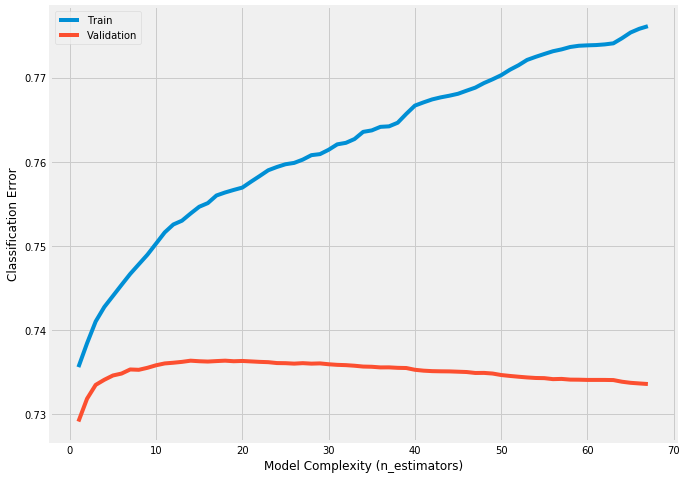

In [22]:
# Graph our train/validation curves

# Get evaluation results from model
results = model.evals_result()

# Get train error
train_error = results['validation_0']['auc']
# Get validation error
val_error = results['validation_1']['auc']
# Set epoch
epoch = range(1, len(train_error)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

In [28]:
# Optimize our hyper parameters
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(objective='binary:logistic', random_state=42)
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbclassifier__boost': ['gbtree', 'dart'],
    'xgbclassifier__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'xgbclassifier__n_estimators': randint(10, 1000),
    'xgbclassifier__max_depth': randint(3, 13)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    cv=2,
    scoring='roc_auc',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed: 11.1min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 13.5min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 26.1min finished


KeyboardInterrupt: 

In [29]:
# Get our best hyperparameters and score
print('Best hyperparameters', search.best_params_)
print('ROC AUC', search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean', 'xgbclassifier__boost': 'gbtree', 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 469}
ROC AUC 0.7340450564995726


In [23]:
# Run the model again with optimized hyper parameters

# Create new model
model = XGBClassifier(
    boost='gbtree',
    n_estimators=469,
    random_state=42,
    n_jobs=-1,
    learning_rate=0.3,
    max_depth=4
)

# Create new evaluation set
eval_set = [(X_train_encoded, y_train), 
           (X_val_encoded, y_val)]

# Fit on train
model.fit(X_train_encoded, y_train, early_stopping_rounds=50,
          eval_metric='auc', eval_set=eval_set)

[0]	validation_0-auc:0.709235	validation_1-auc:0.70971
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.715552	validation_1-auc:0.715578
[2]	validation_0-auc:0.71777	validation_1-auc:0.717805
[3]	validation_0-auc:0.718781	validation_1-auc:0.718933
[4]	validation_0-auc:0.722231	validation_1-auc:0.72256
[5]	validation_0-auc:0.723809	validation_1-auc:0.724039
[6]	validation_0-auc:0.72501	validation_1-auc:0.725317
[7]	validation_0-auc:0.725942	validation_1-auc:0.726129
[8]	validation_0-auc:0.726729	validation_1-auc:0.726861
[9]	validation_0-auc:0.727502	validation_1-auc:0.727656
[10]	validation_0-auc:0.728824	validation_1-auc:0.728897
[11]	validation_0-auc:0.729088	validation_1-auc:0.729159
[12]	validation_0-auc:0.729658	validation_1-auc:0.729762
[13]	validation_0-auc:0.73031	validation_1-auc:0.730331
[14]	validation_0-auc:0.730546	validation_1-auc:0.730527
[15

XGBClassifier(base_score=0.5, boost='gbtree', booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=469, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

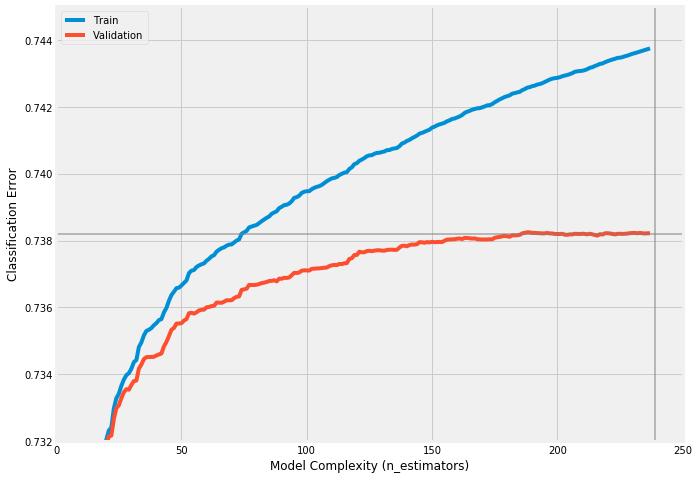

In [24]:
# Graph our new train/validation curves

# Get evaluation results from model
results = model.evals_result()

# Get train error
train_error = results['validation_0']['auc']
# Get validation error
val_error = results['validation_1']['auc']
# Set epoch
epoch = range(1, len(train_error)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim(0.732, 0.745)   # Zoom in
plt.xlim(0, 250)         # Squish x-axis
plt.axvline(x=239,       # Draw vertical line through n_estimators that gives best ROC AUC Score
            color='gray', 
            alpha=0.5,
            linewidth=2) 
plt.axhline(y=0.738209,  # Draw horizontal line through error that gives best ROC AUC Score
            color='gray',
            alpha=0.5,
            linewidth=2)
plt.legend();

In [25]:
# Let's get the metrics for our model
from sklearn.metrics import classification_report

# Get predictions for our validation set
y_pred  = model.predict(X_val_encoded)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Female       0.70      0.63      0.66     55166
        Male       0.67      0.74      0.70     56834

    accuracy                           0.68    112000
   macro avg       0.69      0.68      0.68    112000
weighted avg       0.69      0.68      0.68    112000



In [26]:
# Plot our ROC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve

# Get ROC AUC score for the model
y_pred_proba = model.predict_proba(X_val_encoded)[:,1]
roc_auc_score(y_val, y_pred_proba)  # Should equal ~0.7382 IAW the model we ran earlier

0.7382481125332147

In [27]:
# Define function to plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    
    # Get label names from y target vector
    labels = unique_labels(y_true)
    
    # Set column labels for confusion matrix
    columns = [f'Predicted {label}' for label in labels]
    # Set index labels for confusion matrix
    index = [f'Actual {label}' for label in labels]
    
    # Create pandas dataframe to store info prior to plotting
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns,
                         index=index)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu')

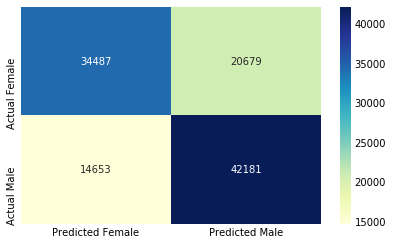

In [28]:
plot_confusion_matrix(y_val, y_pred);

In [29]:
# Visualize the ROC AUC Curve
from ipywidgets import interact, fixed, interactive
from IPython.display import display
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.multiclass import unique_labels

def set_threshold(y_true, y_pred_proba, threshold=0.5):
    """
    For binary classification problems. 
    y_pred_proba : predicted probability of class 1
    """
    
    # Apply threshold to predicted probabilities
    # to get discrete predictions
    class_0, class_1 = unique_labels(y_true)
    y_pred = np.full_like(y_true, fill_value=class_0)
    y_pred[y_pred_proba > threshold] = class_1
    
    # Plot distribution of predicted probabilities
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.title('Distribution of predicted probabilities')
    plt.show()

    # Calculate true positive rate and false positive rate
    true_positives = (y_pred==y_true) & (y_pred==class_1)
    false_positives = (y_pred!=y_true) & (y_pred==class_1)
    actual_positives = (y_true==class_1)
    actual_negatives = (y_true==class_0)
    true_positive_rate = true_positives.sum() / actual_positives.sum()
    false_positive_rate = false_positives.sum() / actual_negatives.sum()
    print('False Positive Rate', false_positive_rate)
    print('True Positive Rate', true_positive_rate)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true==class_1, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Plot point on ROC curve for the current threshold
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()
    
    # Show ROC AUC score
    print('Area under the Receiver Operating Characteristic curve:', 
          roc_auc_score(y_true, y_pred_proba))
    
    # Show confusion matrix & classification report
    plot_confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))

widget = interactive(set_threshold, 
         y_true=fixed(y_val), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0.0,1.0,0.05))

display(widget)

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

In [30]:
# Define function that pulls encoder mappings for the feature we specify
def feature_mapping(feature):
    for item in encoder.mapping:
        if item['col'] == feature:
            feature_mapping = item['mapping']
            
    feature_map = feature_mapping[feature_mapping.index.dropna()]
    category_names = feature_mapping.index.tolist()
    category_codes = feature_mapping.values.tolist()
    
    return (feature_map, category_names, category_codes)

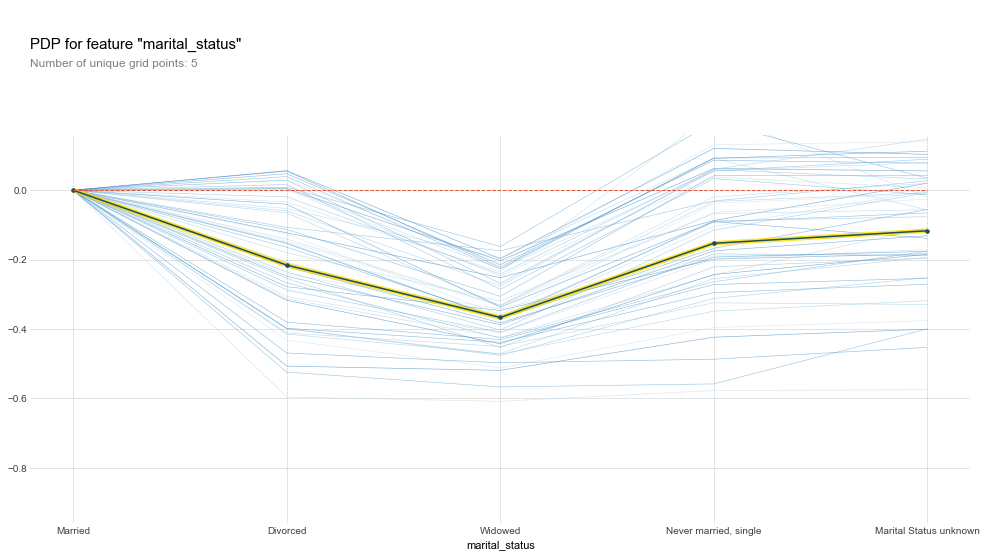

In [33]:
# Let's look at how marital_status affects the model
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'marital_status'

feat_map, names, codes = feature_mapping(feature)

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=50);
# Change the xticks labels
plt.xticks([1, 2, 3, 4, 5], names);

In [34]:
# Look at marital status compared to education level
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# select features
features = ['marital_status', 'education_level']   
    

# Build interaction model
interaction = pdp_interact(
    model=model,
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    features=features
)

# Create pivot table
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)

_, mar_names, mar_codes = feature_mapping(features[0])
_, edu_names, edu_codes = feature_mapping(features[1])

# Add column & index names to pivot table
pdp = pdp.rename(index=dict(zip(edu_codes, edu_names)),
                 columns=dict(zip(mar_codes, mar_names)))

pdp.head()

marital_status,Married,Divorced,Widowed,"Never married, single",Marital Status unknown
education_level,,,,,
college,0.687908,0.439160,0.303084,0.498162,0.515741
high school,0.651932,0.455622,0.296222,0.535828,0.553023
8th grade or less,0.736337,0.526535,0.354280,0.581730,0.675156
postgraduate,0.857529,0.633363,0.611255,0.541281,0.646052


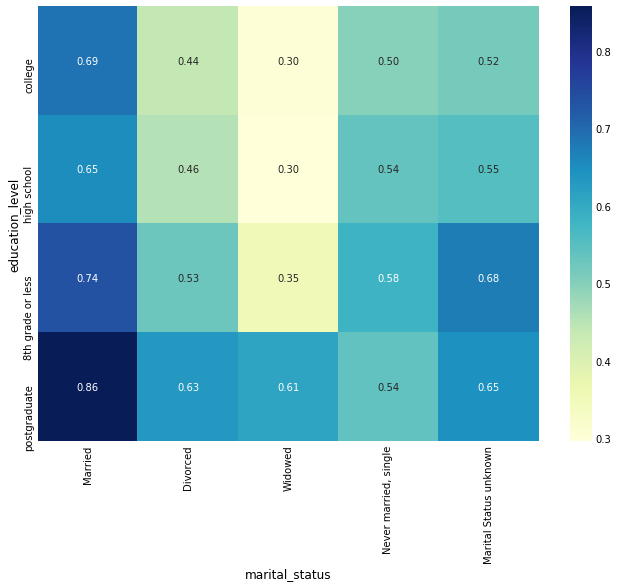

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='YlGnBu');

In [37]:
# The model looks good!
# How does it do on the test data?
X_test_encoded = encoder.transform(X_test)
test_pred_proba = model.predict_proba(X_test_encoded)[:,1]
roc_auc_score(y_test, test_pred_proba)

0.73835384316121

In [38]:
test.columns

Index(['resident_status', 'month_of_death', 'sex', 'detail_age_type', 'detail_age', 'infant_age_recode_22', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code', 'race', 'hispanic_origin', 'hispanic_originrace_recode', 'education_level', 'age_bin', 'heart_disease', 'cancer', 'hiv', 'suicide', 'homicide', 'accident', 'alzheimers', 'respiratory', 'diabetes'], dtype='object')

In [ ]:
# Define a function where the user puts in some arguments and the computer
# predicts whether it's a male or female

def predict(age, marital_status, education_level, race, cause_of_death, threshold=0.5):
    
    # Store input data into pandas dataframe
    df = pd.Dataframe(
        data = [[age, marital_status, education_level, race, heart_disease, cancer, 
                 hiv, suicide, homicide, accident, alzheimers, respiratory, diabetes]],
        columns = ['age', 'marital_status', 'education_level', 'race', 'heart_disease', 'cancer', 
                   'hiv', 'suicide', 'homicide', 'accident', 'alzheimers', 'respiratory', 'diabetes']
    )
    
    # If cause_of_death == one of the columns, set value to True, else False
    
    # Call model for prediction
    pred = model.predict(df)